# U.S. Medical Insurance Costs

# Project Goals:
## 1. Find out average values for each column in dataset.
## 2. Find out mean pricing in every region and draw 4 graphics.
## 3. Show overall pricing difference depending on sex.
## 4. Show pricing for smoker and non-smoker in each region
## 5. Find region where is cheapest insurance cost depending on your age.
## 6. Predicting price of charges using linear regression

# Importing and reading CSV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading CSV in to variable using csv library
records = pd.read_csv("insurance.csv")

# 1. Lets find out mean values for our dataset and draw graphics to see them.

              age        bmi  children       charges
sex                                                 
female  39.503021  30.377749  1.074018  12569.578844
male    38.917160  30.943129  1.115385  13956.751178


Text(-0.4, 0.4, 'Total Females: 662')

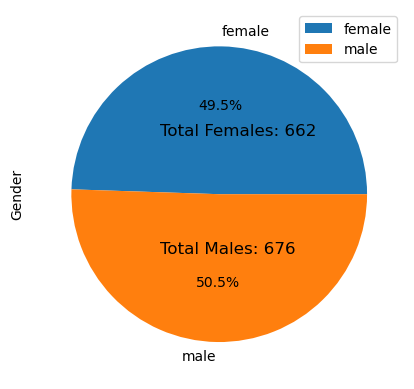

In [3]:
# MEAN VALUES IN GENDER GROUP
###
mean_age = records.groupby(['sex']).mean()
print(mean_age)
###
# MALE AND FEMALE RATIO IN DATASET
###
# Here we find count of males and females to create pie chart
male_count =  records[records['sex'] == 'male'].shape[0]
female_count =  records[records['sex'] == 'female'].shape[0]
# Creating DataFrame with data about count of men and women
data_man_female = pd.DataFrame({'Gender': {'male': male_count, 'female' : female_count}})
# Drawing pie chart which shows ratio of genders
pie_plot = data_man_female.plot(kind="pie", y="Gender", autopct='%1.1f%%')
pie_plot.text(-0.4, -0.4, f'Total Males: {male_count}', fontsize=12)
pie_plot.text(-0.4, 0.4, f'Total Females: {female_count}', fontsize=12)
###

## 2. Find out mean pricing in every region and draw 4 graphics.

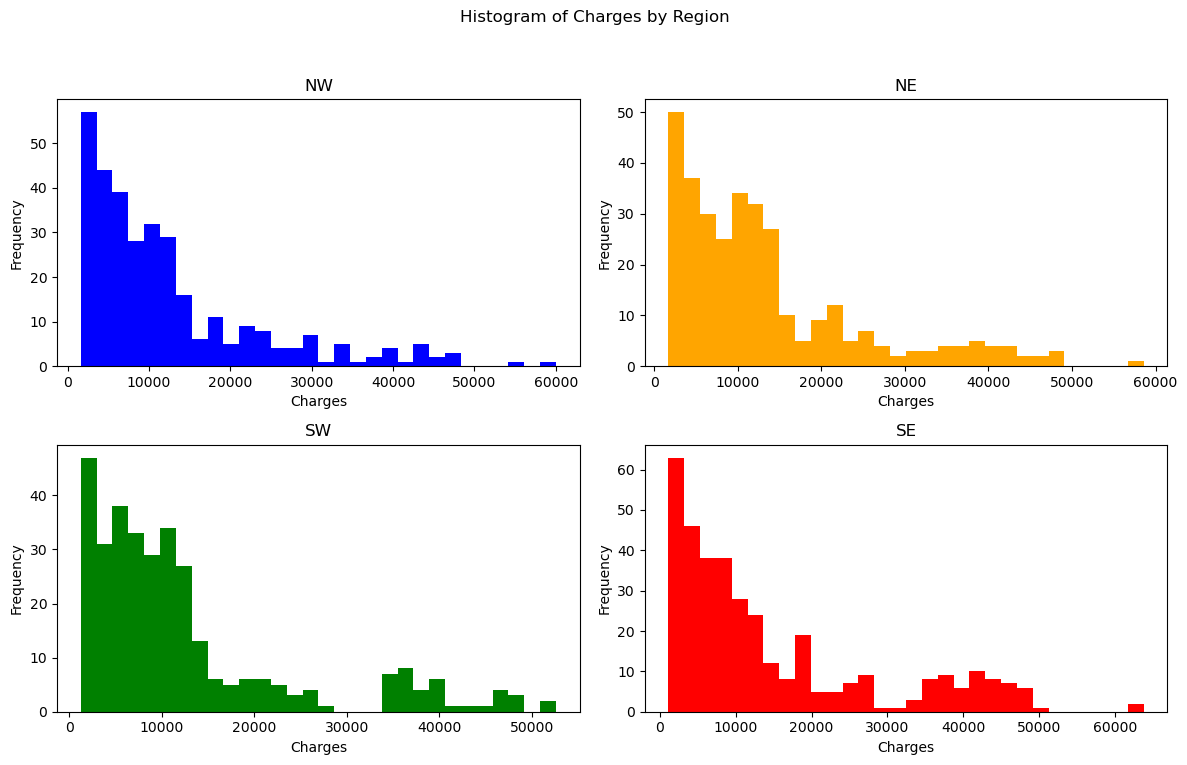

In [4]:
# Filtering regions and selecting only charges columns
nw_records = records[records["region"] == "northwest"]["charges"]
ne_records = records[records["region"] == "northeast"]["charges"]
sw_records = records[records["region"] == "southwest"]["charges"]
se_records = records[records["region"] == "southeast"]["charges"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # getting tuple with 2 elements and assigning first (Figure obj.) to fig and second
#(Axes obj) to axes
fig.suptitle("Histogram of Charges by Region")

# NW region histogram
axes[0, 0].hist(nw_records, bins=30, color='blue')
axes[0, 0].set_title("NW")
axes[0, 0].set_xlabel("Charges")
axes[0, 0].set_ylabel("Frequency")

# NE region histogram
axes[0, 1].hist(ne_records, bins=30, color='orange')
axes[0, 1].set_title("NE")
axes[0, 1].set_xlabel("Charges")
axes[0, 1].set_ylabel("Frequency")

# SW region histogram
axes[1, 0].hist(sw_records, bins=30, color='green')
axes[1, 0].set_title("SW")
axes[1, 0].set_xlabel("Charges")
axes[1, 0].set_ylabel("Frequency")

# SE region histogram
axes[1, 1].hist(se_records, bins=30, color='red')
axes[1, 1].set_title("SE")
axes[1, 1].set_xlabel("Charges")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and display plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 3. Show overall pricing difference depending on sex.

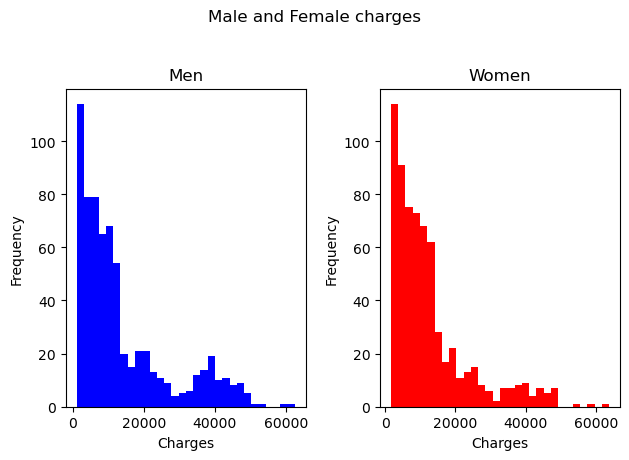

Mean charges for males: 13956.75
Mean charges for females: 12569.58
Difference between male and female charges: 1387.17


In [5]:
# Filtering men and women charges from dataset
male_pricing = records[records['sex'] == 'male']['charges']
female_pricing = records[records['sex'] == 'female']['charges']


# Create subplots
fig, axes = plt.subplots(1, 2)
fig.suptitle("Male and Female charges")

# Male histogram
axes[0].hist(male_pricing, bins=30, color="blue")
axes[0].set_title("Men")
axes[0].set_xlabel("Charges")
axes[0].set_ylabel("Frequency")

# Female histogram
axes[1].hist(female_pricing, bins=30, color="red")
axes[1].set_title("Women")
axes[1].set_xlabel("Charges")
axes[1].set_ylabel("Frequency")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Calculate mean charges for males and females
male_mean_charges = male_pricing.mean()
female_mean_charges = female_pricing.mean()

# Calculate the difference between mean charges
difference = male_mean_charges - female_mean_charges

print(f"Mean charges for males: {male_mean_charges:.2f}")
print(f"Mean charges for females: {female_mean_charges:.2f}")
print(f"Difference between male and female charges: {difference:.2f}")

## 4. Show pricing for smoker and non-smoker in each region

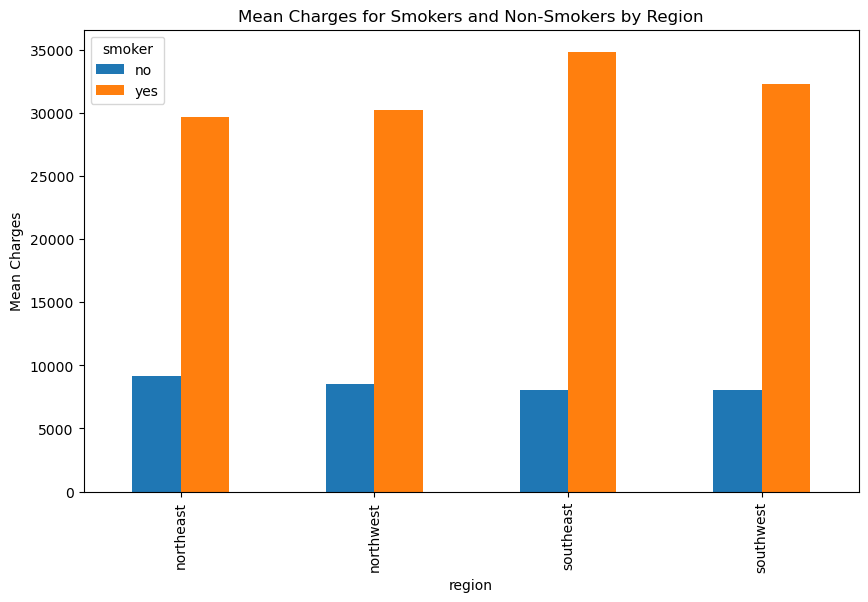

In [6]:
# Filterin smokers and non-smokers by region
#def smoker_or_not(region,smoker_or_no):
 #   return records[(records[region] == region) & records['smoker'] == smoker_or_no]['charges']
#nw_smokers =
mean_charges = records.groupby(['region', 'smoker'])['charges'].mean().reset_index()

# Pivot the DataFrame for easy plotting
mean_charges_pivot = mean_charges.pivot_table(index='region', columns='smoker', values='charges')

# Create a bar plot comparing smokers and non-smokers for each region
ax = mean_charges_pivot.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel("Mean Charges")
ax.set_title("Mean Charges for Smokers and Non-Smokers by Region")
plt.show()

## 5. Find region where is cheapest insurance cost depending on your age.

In [7]:
charges_by_age_region = records.groupby(['age', 'region'])['charges'].mean().reset_index()
cheapest_region = charges_by_age_region.groupby('age')['charges'].idxmin()
cheapest_by_age = charges_by_age_region.loc[cheapest_region].reset_index()

def best_region(age):
    region = cheapest_by_age.loc[cheapest_by_age['age'] == age, 'region'].iloc[0]
    print(f"Your best place to move to have cheapest insurance is {region.capitalize()}.")
best_region(45)

Your best place to move to have cheapest insurance is Southwest.


## 6. Predicting price of insurance using linear regression.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Making categorical values binary to prepare them for analysis
linear_records = pd.get_dummies(records, columns=['sex', 'smoker', 'region'])
# Features which affects charges
X = linear_records.drop(columns=['charges'])
# Target value
y = linear_records['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Obtain the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_
#Predicting price for random values from existing dataset
predicted_price = model.predict(X.sample(1))
print(f"Approx charges for you {int(predicted_price)}.")

Approx charges for you 39769.
